In [ ]:
import pip
import cv2
import numpy as np
import pandas as pd
import math
import datetime
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('seaborn')

In [2]:
df=pd.read_csv('./all_metro_employment.csv')
new_df = df[['state','area','time','Total Nonfarm','Mining, Logging and Construction']].copy()
new_df_no = new_df.dropna()
df_nonull = new_df_no.copy()

In [3]:
df_nonull['newdate'] = pd.to_datetime(df_nonull['time'])
df_nonull['month'] = df_nonull['newdate'].dt.month
df_nonull[['time_period', 'Year']] = df_nonull.time.str.split(', ', expand = True)
df_nonull.drop('time_period', axis=1, inplace=True)
df_nonull.drop('newdate', axis=1, inplace=True)
display(df_nonull)

state                          area         time  Total Nonfarm  \
0      Alabama  Anniston-Oxford-Jacksonville  jan 1, 2011           48.3   
1      Alabama  Anniston-Oxford-Jacksonville  feb 1, 2011           48.2   
2      Alabama  Anniston-Oxford-Jacksonville  mar 1, 2011           48.6   
3      Alabama  Anniston-Oxford-Jacksonville  apr 1, 2011           48.6   
4      Alabama  Anniston-Oxford-Jacksonville  may 1, 2011           48.6   
...        ...                           ...          ...            ...   
57779  Wyoming                      Cheyenne  dec 1, 2020           46.0   
57780  Wyoming                      Cheyenne  jan 1, 2021           45.3   
57781  Wyoming                      Cheyenne  feb 1, 2021           45.4   
57782  Wyoming                      Cheyenne  mar 1, 2021           45.8   
57783  Wyoming                      Cheyenne  apr 1, 2021           46.2   

       Mining, Logging and Construction  month  Year  
0                                   1.0      1  2011  
1                                   0.9      2  2011  
2                                   1.0      3  2011  
3                                   0.9      4  2011  
4                                   1.0      5  2011  
...                                 ...    ...   ...  
57779                               3.5     12  2020  
57780                               3.3      1  2021  
57781                               3.3      2  2021  
57782                               3.4      3  2021  
57783                               3.5      4  2021  

[57784 rows x 7 columns]

In [4]:
data1=df_nonull.groupby(['Year']).sum().reset_index()
fig1 = px.line(data1, x="Year", y="Mining, Logging and Construction")
fig1.update_layout(title_text='Change in employement numbers over time', title_x=0.5)
fig1.show()

/var/folders/l3/xyc3w3h905bbx2syz1k8blym0000gn/T/ipykernel_21199/1280122430.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [5]:
Months4 = df_nonull[df_nonull["month"].isin([1,2,3,4])]
data2=Months4.groupby(['Year']).sum().reset_index()
fig2 = px.line(data2, x="Year", y="Mining, Logging and Construction")
fig2.update_layout(title_text='Change in employement numbers over time', title_x=0.5)
fig2.show()

/var/folders/l3/xyc3w3h905bbx2syz1k8blym0000gn/T/ipykernel_21199/865401822.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [6]:
data = df_nonull[df_nonull["Year"]< "2021"]
data2=data.groupby(['state','Year']).sum().reset_index()
fig2 = px.bar(data2, x="state", y="Mining, Logging and Construction",color="Year")
fig2.update_layout(title_text='Total Construction jobs in all metropolitan areas', title_x=0.5)
fig2.show()

/var/folders/l3/xyc3w3h905bbx2syz1k8blym0000gn/T/ipykernel_21199/1325568941.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [7]:
# rows = 5
# cols = 2
# subplot_titles = ["California", "Pennsylvania", "District of Columbia", "Texas", "Illinois", "Massachusetts", "Florida", "Missouri", "New York", "Georgia"]

# subplots_fig = make_subplots(
#         rows=rows,
#         cols=cols,
#         subplot_titles=subplot_titles,  
#         print_grid=True,
# #     vertical_spacing=0.085,
# #                     horizontal_spacing=0.085,
#                     x_title='Years',
#                     y_title='Number of employees in Construction')
# #     horizontal_spacing=0.15, vertical_spacing=0.15)

# data_sub2 = data2.loc[data2['state'].isin(["California", "Pennsylvania", "District of Columbia", "Texas", "Illinois", "Massachusetts", "Florida", "Missouri", "New York", "Georgia"])]             
# Cali = data_sub2[data_sub2["state"]=="California"]
# Colum = data_sub2[data_sub2["state"]=="District of Columbia"]
# Illi = data_sub2[data_sub2["state"]=="Illinois"]
# NewY = data_sub2[data_sub2["state"]=="New York"]
# Pen = data_sub2[data_sub2["state"]=="Pennsylvania"]
# Texas = data_sub2[data_sub2["state"]=="Texas"]
# Florida = data_sub2[data_sub2["state"]=="Florida"]
# Mass = data_sub2[data_sub2["state"]=="Massachusetts"]
# Missouri = data_sub2[data_sub2["state"]=="Missouri"]
# Georgia = data_sub2[data_sub2["state"]=="Georgia"]

# subplots_fig.add_trace(
#     go.Scatter(x=Cali["Year"],y=Cali["Mining, Logging and Construction"], marker=dict(color="crimson"), showlegend=False),
#     row=1, col=1
# )

# subplots_fig.add_trace(
#     go.Scatter(x=Colum["Year"],y=Colum["Mining, Logging and Construction"], marker=dict(color="crimson"), showlegend=False),
#     row=2, col=1
# )

# subplots_fig.add_trace(
#     go.Scatter(x=Illi["Year"],y=Illi["Mining, Logging and Construction"], marker=dict(color="crimson"), showlegend=False),
#     row=3, col=1
# )


# subplots_fig.add_trace(
#     go.Scatter(x=Florida["Year"],y=Florida["Mining, Logging and Construction"], marker=dict(color="crimson"), showlegend=False),
#     row=4, col=1
# )

# subplots_fig.add_trace(
#     go.Scatter(x=NewY["Year"],y=NewY["Mining, Logging and Construction"], marker=dict(color="crimson"), showlegend=False),
#     row=5, col=1
# )
# subplots_fig.add_trace(
#     go.Scatter(x=Pen["Year"],y=Pen["Mining, Logging and Construction"], marker=dict(color="crimson"), showlegend=False),
#     row=1, col=2
# )
# subplots_fig.add_trace(
#     go.Scatter(x=Texas["Year"],y=Texas["Mining, Logging and Construction"], marker=dict(color="crimson"), showlegend=False),
#     row=2, col=2
# )

# subplots_fig.add_trace(
#     go.Scatter(x=Mass["Year"],y=Mass["Mining, Logging and Construction"], marker=dict(color="crimson"), showlegend=False),
#     row=3, col=2
# )

# subplots_fig.add_trace(
#     go.Scatter(x=Missouri["Year"],y=Missouri["Mining, Logging and Construction"], marker=dict(color="crimson"), showlegend=False),
#     row=4, col=2
# )

# subplots_fig.add_trace(
#     go.Scatter(x=Georgia["Year"],y=Georgia["Mining, Logging and Construction"], marker=dict(color="crimson"), showlegend=False),
#     row=5, col=2
# )

# subplots_fig.update_layout(height = 1000, width = 900, autosize = False, title="Yearly changes for top 10 metropolitan areas",  
#                            title_x=0.5)


# subplots_fig.show()


/var/folders/l3/xyc3w3h905bbx2syz1k8blym0000gn/T/ipykernel_21199/428684025.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0.5, 0.98, 'Yearly changes for top 10 metropolitan areas')

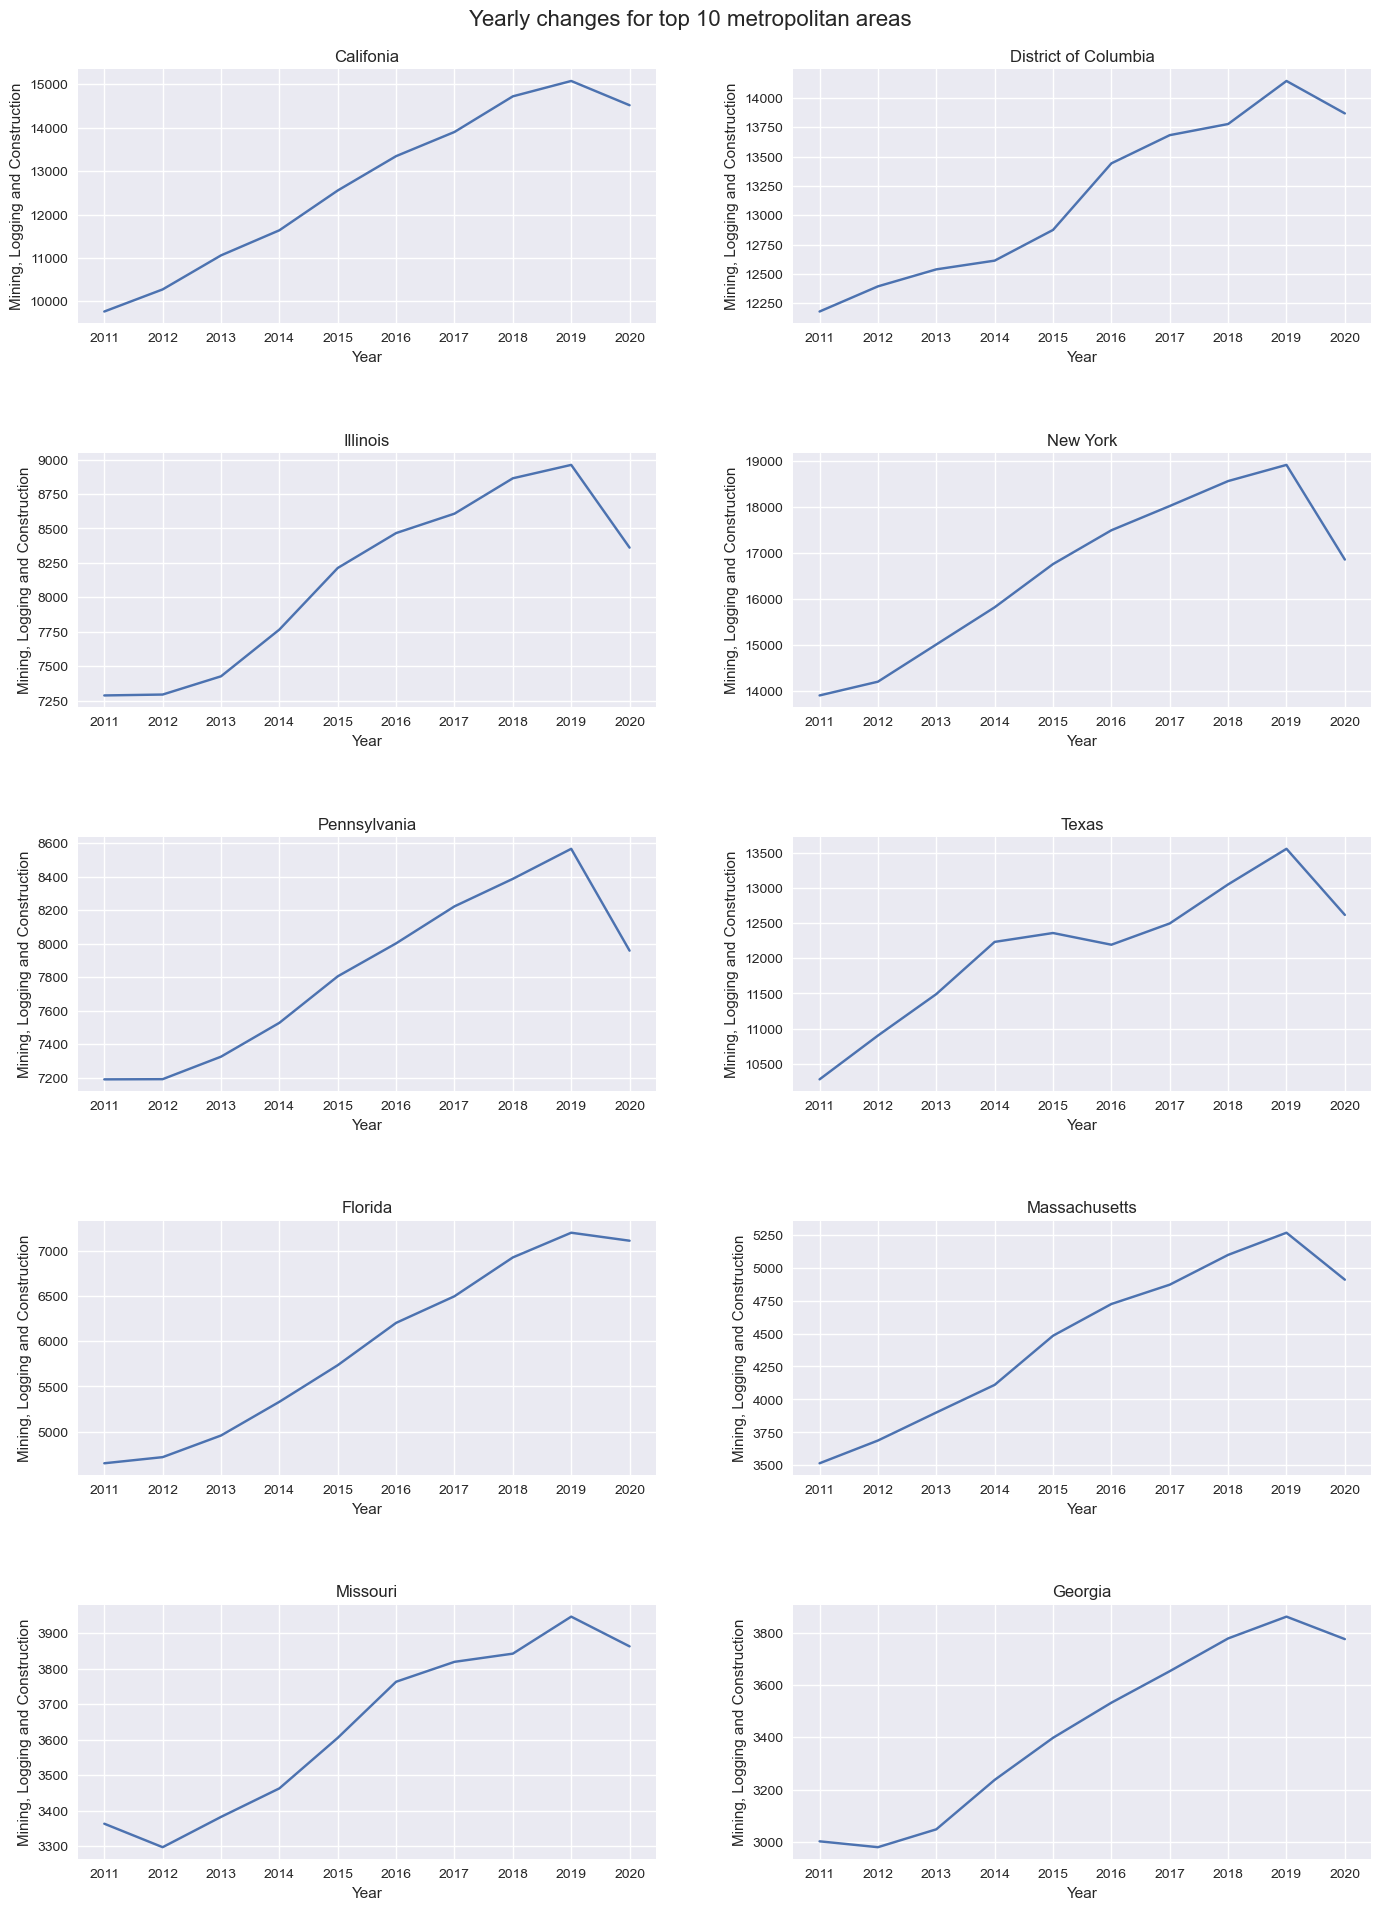

In [8]:
data3=data.groupby(['Year','state']).sum().reset_index()
data_sub3 = data3.loc[data3['state'].isin(["California", "District of Columbia", "Illinois", "Florida", "New York", "Pennsylvania", "Texas", "Massachusetts", "Missouri", "Georgia"])]             

Cali1 = data_sub3[data_sub3["state"]=="California"]
Colum1 = data_sub3[data_sub3["state"]=="District of Columbia"]
Illi1 = data_sub3[data_sub3["state"]=="Illinois"]
NewY1 = data_sub3[data_sub3["state"]=="New York"]
Pen1 = data_sub3[data_sub3["state"]=="Pennsylvania"]
Texas1 = data_sub3[data_sub3["state"]=="Texas"]
Florida1 = data_sub3[data_sub3["state"]=="Florida"]
Mass1 = data_sub3[data_sub3["state"]=="Massachusetts"]
Missouri1 = data_sub3[data_sub3["state"]=="Missouri"]
Georgia1 = data_sub3[data_sub3["state"]=="Georgia"]


fig, axes = plt.subplots(5, 2, figsize=(15, 20))


sns.lineplot(ax=axes[0, 0], data=Cali1, x='Year', y='Mining, Logging and Construction').set(title='Califonia')
sns.lineplot(ax=axes[0, 1], data=Colum1, x='Year', y='Mining, Logging and Construction').set(title='District of Columbia')
sns.lineplot(ax=axes[1, 0], data=Illi1, x='Year', y='Mining, Logging and Construction').set(title='Illinois')
sns.lineplot(ax=axes[1, 1], data=NewY1, x='Year', y='Mining, Logging and Construction').set(title='New York')
sns.lineplot(ax=axes[2, 0], data=Pen1, x='Year', y='Mining, Logging and Construction').set(title='Pennsylvania')
sns.lineplot(ax=axes[2, 1], data=Texas1, x='Year', y='Mining, Logging and Construction').set(title='Texas')
sns.lineplot(ax=axes[3, 0], data=Florida1, x='Year', y='Mining, Logging and Construction').set(title='Florida')
sns.lineplot(ax=axes[3, 1], data=Mass1, x='Year', y='Mining, Logging and Construction').set(title='Massachusetts')
sns.lineplot(ax=axes[4, 0], data=Missouri1, x='Year', y='Mining, Logging and Construction').set(title='Missouri')
sns.lineplot(ax=axes[4, 1], data=Georgia1, x='Year', y='Mining, Logging and Construction').set(title='Georgia')
fig.tight_layout(pad=5.0)

fig.subplots_adjust(top=0.95)
fig.suptitle('Yearly changes for top 10 metropolitan areas', fontsize=16)



/var/folders/l3/xyc3w3h905bbx2syz1k8blym0000gn/T/ipykernel_21199/2329040670.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0.5, 0.98, 'Monthly changes for top 10 metropolitan areas')

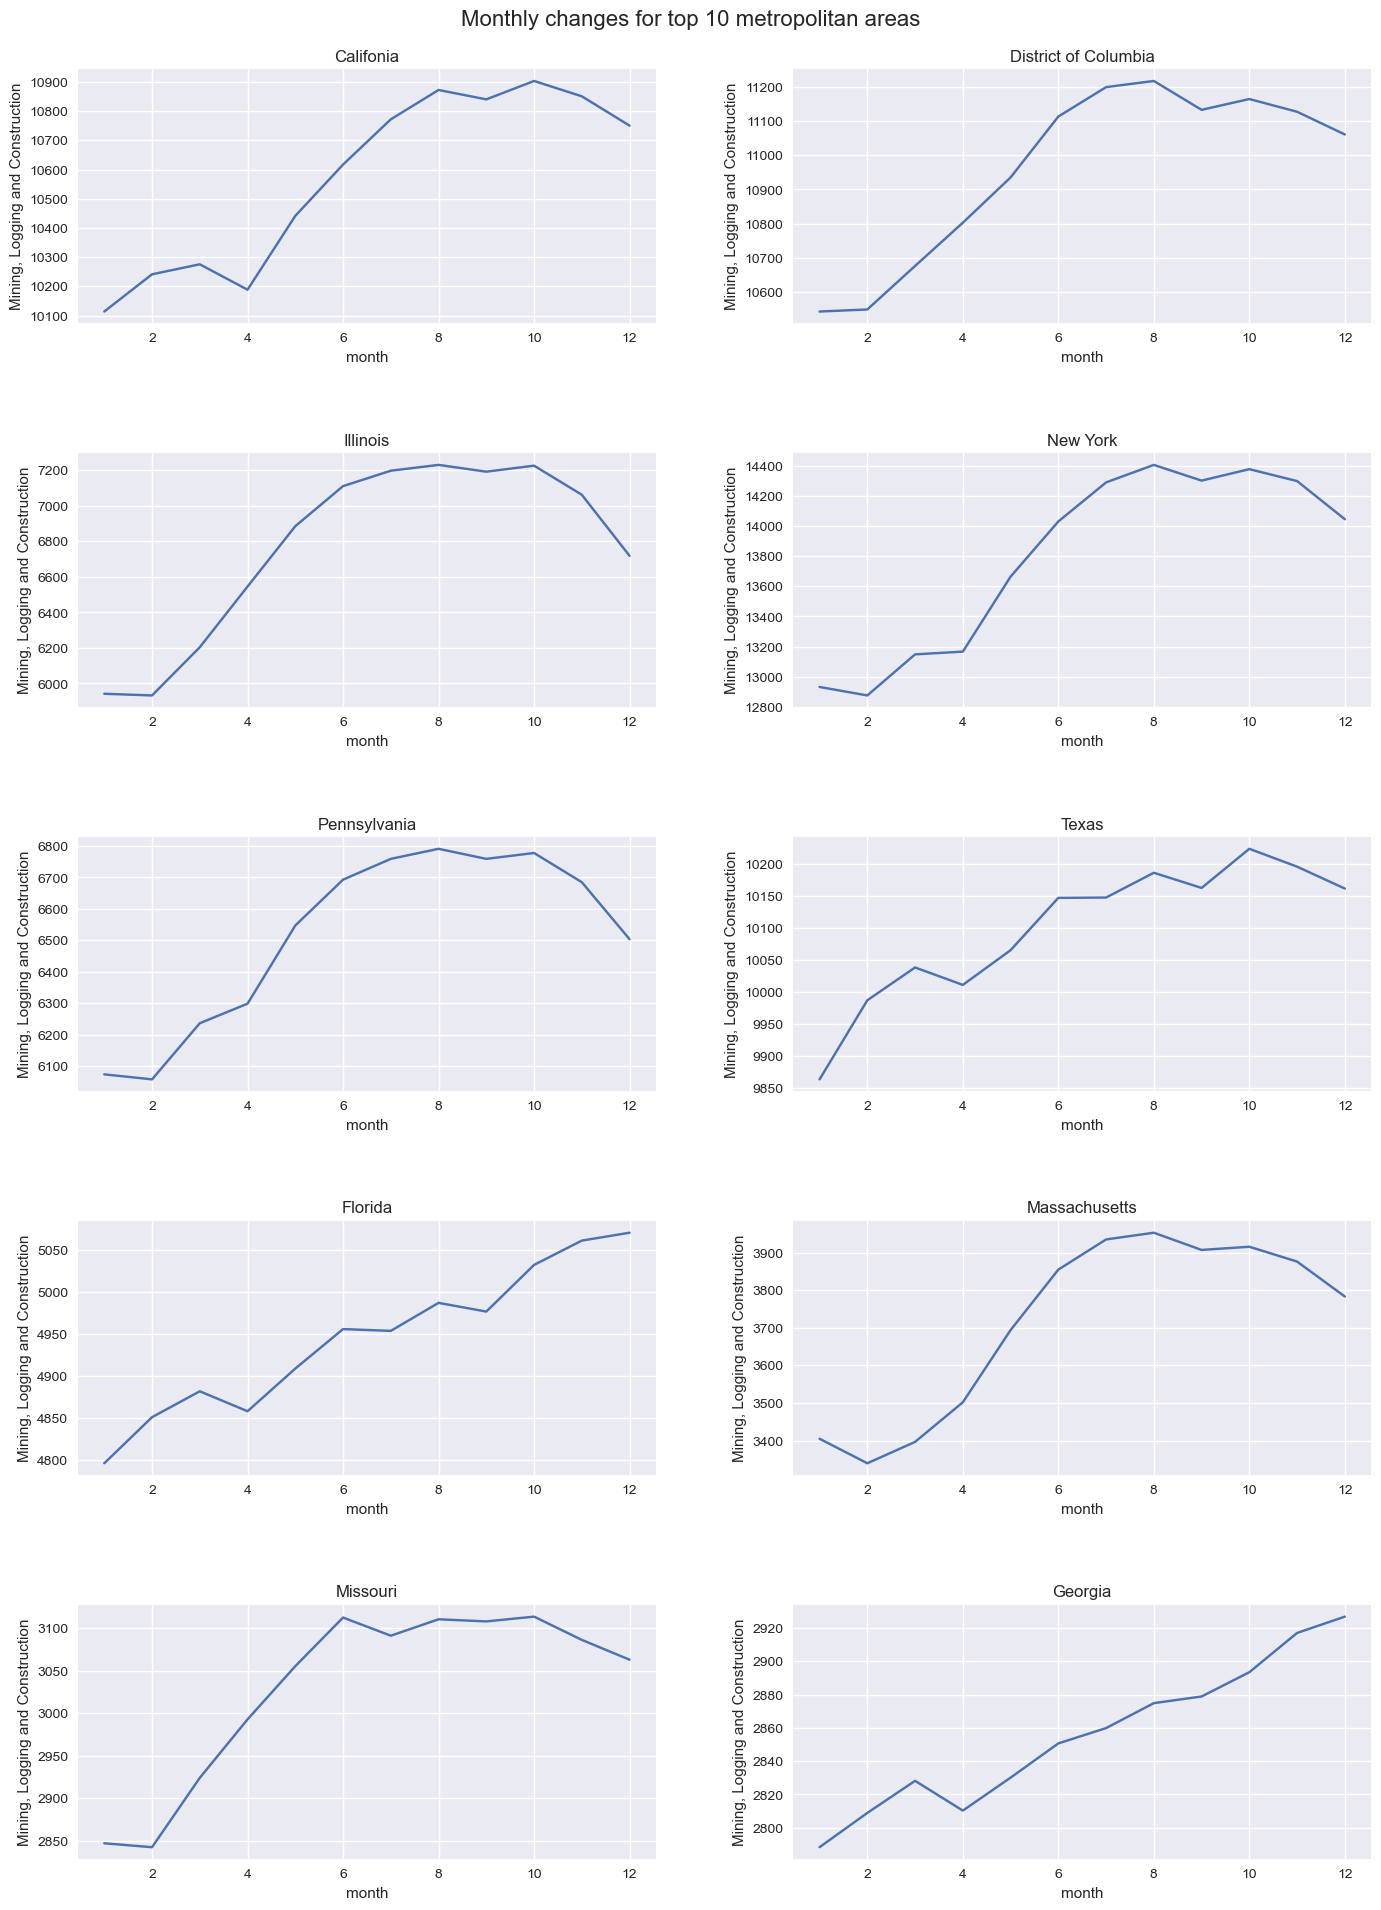

In [9]:
data3=data.groupby(['month','state']).sum().reset_index()
data_sub3 = data3.loc[data3['state'].isin(["California", "District of Columbia", "Illinois", "Florida", "New York", "Pennsylvania", "Texas", "Massachusetts", "Missouri", "Georgia"])]             

Cali1 = data_sub3[data_sub3["state"]=="California"]
Colum1 = data_sub3[data_sub3["state"]=="District of Columbia"]
Illi1 = data_sub3[data_sub3["state"]=="Illinois"]
NewY1 = data_sub3[data_sub3["state"]=="New York"]
Pen1 = data_sub3[data_sub3["state"]=="Pennsylvania"]
Texas1 = data_sub3[data_sub3["state"]=="Texas"]
Florida1 = data_sub3[data_sub3["state"]=="Florida"]
Mass1 = data_sub3[data_sub3["state"]=="Massachusetts"]
Missouri1 = data_sub3[data_sub3["state"]=="Missouri"]
Georgia1 = data_sub3[data_sub3["state"]=="Georgia"]


fig, axes = plt.subplots(5, 2, figsize=(15, 20))


sns.lineplot(ax=axes[0, 0], data=Cali1, x='month', y='Mining, Logging and Construction').set(title='Califonia')
sns.lineplot(ax=axes[0, 1], data=Colum1, x='month', y='Mining, Logging and Construction').set(title='District of Columbia')
sns.lineplot(ax=axes[1, 0], data=Illi1, x='month', y='Mining, Logging and Construction').set(title='Illinois')
sns.lineplot(ax=axes[1, 1], data=NewY1, x='month', y='Mining, Logging and Construction').set(title='New York')
sns.lineplot(ax=axes[2, 0], data=Pen1, x='month', y='Mining, Logging and Construction').set(title='Pennsylvania')
sns.lineplot(ax=axes[2, 1], data=Texas1, x='month', y='Mining, Logging and Construction').set(title='Texas')
sns.lineplot(ax=axes[3, 0], data=Florida1, x='month', y='Mining, Logging and Construction').set(title='Florida')
sns.lineplot(ax=axes[3, 1], data=Mass1, x='month', y='Mining, Logging and Construction').set(title='Massachusetts')
sns.lineplot(ax=axes[4, 0], data=Missouri1, x='month', y='Mining, Logging and Construction').set(title='Missouri')
sns.lineplot(ax=axes[4, 1], data=Georgia1, x='month', y='Mining, Logging and Construction').set(title='Georgia')
fig.tight_layout(pad=5.0)

fig.subplots_adjust(top=0.95)
fig.suptitle('Monthly changes for top 10 metropolitan areas', fontsize=16)



In [10]:
data4=data.groupby(['state', 'area', 'Year','month']).sum().reset_index()
stateT = data4[data4["state"] =="Texas"]

fig3 = px.sunburst(stateT, path= ['area'],values='Mining, Logging and Construction', 
                   color='area', hover_data=['Mining, Logging and Construction'],
                   color_continuous_scale='RdBu',
                   color_continuous_midpoint=np.average(stateT['Mining, Logging and Construction']))

fig3.update_layout(
    showlegend=False,
    font={'size': 12},
    title={'text': '<b>Metropolitan areas in Texas</b>', 'font': {'size': 18}},
    title_x=0.5
)
                   
fig3.show()

/var/folders/l3/xyc3w3h905bbx2syz1k8blym0000gn/T/ipykernel_21199/1638975281.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [11]:
fig5 = go.Figure()
data5=data.groupby(['state', 'area', 'Year']).sum().reset_index()
Houston = data5[data5["area"] =="Houston-The Woodlands-Sugar Land"]

fig5.add_trace(
    go.Line(x=Houston["Year"],y=Houston["Mining, Logging and Construction"]))

# fig4.add_trace(
#     go.Bar(x=Houston["Year"],y=Houston["Mining, Logging and Construction"]))
fig5.update_layout(
    showlegend=False,
    title={'text': '<b>Total number of Employees in Houston over Years</b>', 'font': {'size': 18}},
    title_x=0.5
)

fig5.update_xaxes(title_text="Years")
fig5.update_yaxes(title_text="Mining, Logging and Construction")


fig5.show()

/var/folders/l3/xyc3w3h905bbx2syz1k8blym0000gn/T/ipykernel_21199/250056377.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/Users/esshariprasad/miniforge3/envs/tf/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [12]:
data6=data.groupby(['state','Year','month']).sum().reset_index()

texas = data6[data6["state"] == "Texas"]
data_1 = texas.loc[texas['Year'].isin(["2011", "2012", "2013"])] 
data_2 = texas.loc[texas['Year'].isin(["2014", "2015", "2016", "2017", "2018"])]
data_3 = texas.loc[texas['Year'].isin(["2019", "2020"])]

figures = [
    px.bar(data_1, x="month", y="Mining, Logging and Construction", color="Year"),
    px.scatter(data_2, x="month", y="Mining, Logging and Construction", color="Year"),
    px.bar(data_3, x="month", y="Mining, Logging and Construction", color="Year")
]

fig = make_subplots(rows=len(figures), cols=1, x_title='month', y_title='Number of employees in Construction') 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=1)

fig.update_layout(height = 1000, width = 1600, autosize = False, 
                  title={'text': "Yearly changes for Texas state", 'font': {'size': 25}}, title_x=0.5)
                   
plot(fig)



/var/folders/l3/xyc3w3h905bbx2syz1k8blym0000gn/T/ipykernel_21199/3624619509.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



'temp-plot.html'

In [13]:
fig7 = px.scatter(data_3, x="month", y="Mining, Logging and Construction", color="Year")
fig7.update_layout(title_text='Change in employement numbers in texas during COVID', title_x=0.5)

fig7.show()

In [14]:
changeTx1 = texas.loc[texas['Year'].isin(["2015", "2016", "2017"])]
cngTx = px.line(changeTx1, x="month", y="Mining, Logging and Construction", color="Year")
cngTx.update_layout(title_text='Change in employement numbers in texas during oil bust', title_x=0.5)

cngTx.show()

In [15]:
data6=data.groupby(['state','Year','month']).sum().reset_index()
display(data6)

/var/folders/l3/xyc3w3h905bbx2syz1k8blym0000gn/T/ipykernel_21199/208678564.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



state  Year  month  Total Nonfarm  Mining, Logging and Construction
0     Alabama  2011      1         1432.2                              71.0
1     Alabama  2011      2         1442.4                              72.4
2     Alabama  2011      3         1451.6                              74.4
3     Alabama  2011      4         1457.0                              73.8
4     Alabama  2011      5         1459.9                              75.1
...       ...   ...    ...            ...                               ...
6115  Wyoming  2020      8           83.3                               8.1
6116  Wyoming  2020      9           83.1                               8.0
6117  Wyoming  2020     10           83.6                               8.3
6118  Wyoming  2020     11           83.1                               8.0
6119  Wyoming  2020     12           82.9                               7.8

[6120 rows x 5 columns]

In [16]:
Nyk = data6[data6["state"] == "New York"]

data_n1 = Nyk.loc[Nyk['Year'].isin(["2011", "2012", "2013"])] 
data_n2 = Nyk.loc[Nyk['Year'].isin(["2014", "2015", "2016", "2017", "2018"])]             
data_n3 = Nyk.loc[Nyk['Year'].isin(["2019", "2020"])]

figures = [
    px.bar(data_n1, x="month", y="Mining, Logging and Construction", color="Year"),
    px.scatter(data_n2, x="month", y="Mining, Logging and Construction", color="Year"),
    px.bar(data_n3, x="month", y="Mining, Logging and Construction", color="Year")
]

fig = make_subplots(rows=len(figures), cols=1,x_title='month', y_title='Number of employees in Construction') 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=1)
        
fig.update_layout(height = 1000, width = 1600, autosize = False, 
                  title={'text': "Yearly changes for New York state", 'font': {'size': 25}}, title_x=0.5)
      
plot(fig)



'temp-plot.html'

In [17]:
Dc = data6[data6["state"] == "District of Columbia"]

data_d1 = Dc.loc[Dc['Year'].isin(["2011", "2012", "2013"])] 
data_d2 = Dc.loc[Dc['Year'].isin(["2014", "2015", "2016", "2017", "2018"])]             
data_d3 = Dc.loc[Dc['Year'].isin(["2019", "2020"])]

figures = [
    px.bar(data_d1, x="month", y="Mining, Logging and Construction", color="Year"),
    px.scatter(data_d2, x="month", y="Mining, Logging and Construction", color="Year"),
    px.bar(data_d3, x="month", y="Mining, Logging and Construction", color="Year")
]

fig = make_subplots(rows=len(figures), cols=1,x_title='month', y_title='Number of employees in Construction') 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=1)
        
        
fig.update_layout(height = 1000, width = 1600, autosize = False, 
                  title={'text': "Yearly changes at District of Columbia", 'font': {'size': 25}}, title_x=0.5)
  
        
plot(fig)


'temp-plot.html'

In [18]:

Miss = data6[data6["state"] == "Missouri"]

data_miss1 = Miss.loc[Miss['Year'].isin(["2011", "2012", "2013"])] 
data_miss2 = Miss.loc[Miss['Year'].isin(["2014", "2015", "2016", "2017", "2018"])]             
data_miss3 = Miss.loc[Miss['Year'].isin(["2019", "2020"])]

figures = [
    px.bar(data_miss1, x="month", y="Mining, Logging and Construction", color="Year"),
    px.scatter(data_miss2, x="month", y="Mining, Logging and Construction", color="Year"),
    px.bar(data_miss3, x="month", y="Mining, Logging and Construction", color="Year")
]

fig = make_subplots(rows=len(figures), cols=1,x_title='month', y_title='Number of employees in Construction') 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=1)
        
fig.update_layout(height = 1000, width = 1600, autosize = False, 
                  title={'text': "Yearly changes at Missouri state", 'font': {'size': 25}}, title_x=0.5)
  
        
plot(fig)



'temp-plot.html'

In [19]:
Pen = data6[data6["state"] == "Pennsylvania"]
changePe1 = Pen.loc[Pen['Year'].isin(["2019", "2020"])]
cngPe = px.line(changePe1, x="month", y="Mining, Logging and Construction", color="Year")
cngPe.update_layout(title_text='Change in employement numbers in Pennsylvania during COVID', title_x=0.5)

cngPe.show()


In [20]:
illi = data6[data6["state"] == "Illinois"]
changeIl1 = illi.loc[illi['Year'].isin(["2019", "2020"])]
cngIl = px.line(changeIl1, x="month", y="Mining, Logging and Construction", color="Year")
cngIl.update_layout(title_text='Change in employement numbers in Illinois during COVID', title_x=0.5)

cngIl.show()

In [21]:
Mi = data6[data6["state"] == "Massachusetts"]
data_M1 = Mi.loc[Mi['Year'].isin(["2011", "2012", "2013"])] 
data_M2 = Mi.loc[Mi['Year'].isin(["2014", "2015", "2016", "2017", "2018"])]             
data_M3 = Mi.loc[Mi['Year'].isin(["2019", "2020"])]

figures = [
    px.bar(data_M1, x="month", y="Mining, Logging and Construction", color="Year"),
    px.scatter(data_M2, x="month", y="Mining, Logging and Construction", color="Year"),
    px.bar(data_M3, x="month", y="Mining, Logging and Construction", color="Year")
]

fig = make_subplots(rows=len(figures), cols=1, x_title='month', y_title='Number of employees in Construction') 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=1)
fig.update_layout(height = 1000, width = 1600, autosize = False, 
                  title={'text': "Yearly changes at Massachusetts", 'font': {'size': 25}}, title_x=0.5)
  

plot(fig)



'temp-plot.html'

In [22]:
Season = []
data7=data.groupby(['Year','month']).sum().reset_index()
for s in data7['month'].values:
    if s==12 or s==1 or s==2:
        Season.append("Winter")
    elif s==3 or s==4 or s==5:
        Season.append("Spring")
    elif s==6 or s==7 or s==8:
        Season.append("Summer")
    else:
        Season.append("Fall")
Season
data7['Season'] = Season

fig8 = px.scatter(data7, x="Year", y="Mining, Logging and Construction", color="Season")
fig8.update_layout(title_text='Change in Number of Employee at different Seasons', title_x=0.5)
fig8.show()

/var/folders/l3/xyc3w3h905bbx2syz1k8blym0000gn/T/ipykernel_21199/2342257300.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [23]:
test= df_nonull.copy()
test[['time_period', 'Year']] = test.time.str.split(', ', expand = True)
test[['month', 'day']]= test.time_period.str.split(' ', expand=True)
test.drop('time_period', axis=1, inplace=True)
display(test)

state                          area         time  Total Nonfarm  \
0      Alabama  Anniston-Oxford-Jacksonville  jan 1, 2011           48.3   
1      Alabama  Anniston-Oxford-Jacksonville  feb 1, 2011           48.2   
2      Alabama  Anniston-Oxford-Jacksonville  mar 1, 2011           48.6   
3      Alabama  Anniston-Oxford-Jacksonville  apr 1, 2011           48.6   
4      Alabama  Anniston-Oxford-Jacksonville  may 1, 2011           48.6   
...        ...                           ...          ...            ...   
57779  Wyoming                      Cheyenne  dec 1, 2020           46.0   
57780  Wyoming                      Cheyenne  jan 1, 2021           45.3   
57781  Wyoming                      Cheyenne  feb 1, 2021           45.4   
57782  Wyoming                      Cheyenne  mar 1, 2021           45.8   
57783  Wyoming                      Cheyenne  apr 1, 2021           46.2   

       Mining, Logging and Construction month  Year day  
0                                   1.0   jan  2011   1  
1                                   0.9   feb  2011   1  
2                                   1.0   mar  2011   1  
3                                   0.9   apr  2011   1  
4                                   1.0   may  2011   1  
...                                 ...   ...   ...  ..  
57779                               3.5   dec  2020   1  
57780                               3.3   jan  2021   1  
57781                               3.3   feb  2021   1  
57782                               3.4   mar  2021   1  
57783                               3.5   apr  2021   1  

[57784 rows x 8 columns]

In [24]:
d2011 = test[test["Year"]=="2011"]
d2012 = test[test["Year"]=="2012"]
d2013 = test[test["Year"]=="2013"]
d2014 = test[test["Year"]=="2014"]
d2015 = test[test["Year"]=="2015"]
d2016 = test[test["Year"]=="2016"]
d2017 = test[test["Year"]=="2017"]
d2018 = test[test["Year"]=="2018"]
d2019 = test[test["Year"]=="2019"]
d2020 = test[test["Year"]=="2020"]

d211=d2011.groupby(['state']).sum().reset_index()
d212=d2012.groupby(['state']).sum().reset_index()
d213=d2013.groupby(['state']).sum().reset_index()
d214=d2014.groupby(['state']).sum().reset_index()
d215=d2015.groupby(['state']).sum().reset_index()
d216=d2016.groupby(['state']).sum().reset_index()
d217=d2017.groupby(['state']).sum().reset_index()
d218=d2018.groupby(['state']).sum().reset_index()
d219=d2019.groupby(['state']).sum().reset_index()
d220=d2020.groupby(['state']).sum().reset_index()


/var/folders/l3/xyc3w3h905bbx2syz1k8blym0000gn/T/ipykernel_21199/3708558836.py:12: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/l3/xyc3w3h905bbx2syz1k8blym0000gn/T/ipykernel_21199/3708558836.py:13: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/l3/xyc3w3h905bbx2syz1k8blym0000gn/T/ipykernel_21199/3708558836.py:14: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/var/folders/l3/xyc3w3h905bbx2syz1k8b

In [25]:
dsub1 = d211.loc[d211['state'].isin(["California", "District of Columbia", "Illinois", "Florida", "New York", "Pennsylvania", "Texas", "Washington"])].drop(columns=['Total Nonfarm'])          
dsub2 = d212.loc[d211['state'].isin(["California", "District of Columbia", "Illinois", "Florida", "New York", "Pennsylvania", "Texas", "Washington"])].drop(columns=['Total Nonfarm'])             
dsub3 = d213.loc[d211['state'].isin(["California", "District of Columbia", "Illinois", "Florida", "New York", "Pennsylvania", "Texas", "Washington"])].drop(columns=['Total Nonfarm'])            
dsub4 = d214.loc[d211['state'].isin(["California", "District of Columbia", "Illinois", "Florida", "New York", "Pennsylvania", "Texas", "Washington"])].drop(columns=['Total Nonfarm'])           
dsub5 = d215.loc[d211['state'].isin(["California", "District of Columbia", "Illinois", "Florida", "New York", "Pennsylvania", "Texas", "Washington"])].drop(columns=['Total Nonfarm'])           
dsub6 = d216.loc[d211['state'].isin(["California", "District of Columbia", "Illinois", "Florida", "New York", "Pennsylvania", "Texas", "Washington"])].drop(columns=['Total Nonfarm'])           
dsub7 = d217.loc[d211['state'].isin(["California", "District of Columbia", "Illinois", "Florida", "New York", "Pennsylvania", "Texas", "Washington"])].drop(columns=['Total Nonfarm'])          
dsub8 = d218.loc[d211['state'].isin(["California", "District of Columbia", "Illinois", "Florida", "New York", "Pennsylvania", "Texas", "Washington"])].drop(columns=['Total Nonfarm'])          
dsub9 = d219.loc[d211['state'].isin(["California", "District of Columbia", "Illinois", "Florida", "New York", "Pennsylvania", "Texas", "Washington"])].drop(columns=['Total Nonfarm'])          
dsub220 = d220.loc[d211['state'].isin(["California", "District of Columbia", "Illinois", "Florida", "New York", "Pennsylvania", "Texas", "Washington"])].drop(columns=['Total Nonfarm'])        

dsub1.rename(columns = {'Mining, Logging and Construction':'Total_2011'}, inplace = True)
dsub2.rename(columns = {'Mining, Logging and Construction':'Total_2012'}, inplace = True)
dsub3.rename(columns = {'Mining, Logging and Construction':'Total_2013'}, inplace = True)
dsub4.rename(columns = {'Mining, Logging and Construction':'Total_2014'}, inplace = True)
dsub5.rename(columns = {'Mining, Logging and Construction':'Total_2015'}, inplace = True)
dsub6.rename(columns = {'Mining, Logging and Construction':'Total_2016'}, inplace = True)
dsub7.rename(columns = {'Mining, Logging and Construction':'Total_2017'}, inplace = True)
dsub8.rename(columns = {'Mining, Logging and Construction':'Total_2018'}, inplace = True)
dsub9.rename(columns = {'Mining, Logging and Construction':'Total_2019'}, inplace = True)
dsub220.rename(columns = {'Mining, Logging and Construction':'Total_2020'}, inplace = True)


df = dsub1.copy()
df = df.join(dsub2["Total_2012"])
df = df.join(dsub3["Total_2013"])
df = df.join(dsub4["Total_2014"])
df = df.join(dsub5["Total_2015"])
df = df.join(dsub6["Total_2016"])
df = df.join(dsub7["Total_2017"])
df = df.join(dsub8["Total_2018"])
df = df.join(dsub9["Total_2019"])
df = df.join(dsub220["Total_2020"])

display(df)


state  Total_2011  Total_2012  Total_2013  Total_2014  \
4             California      9766.4     10276.0     11059.9     11638.3   
8   District of Columbia     12180.4     12394.8     12539.6     12614.0   
9                Florida      4649.5      4717.4      4957.0      5330.1   
13              Illinois      7288.8      7295.3      7427.6      7766.6   
32              New York     13911.2     14209.4     15015.7     15821.6   
38          Pennsylvania      7190.9      7192.0      7326.3      7528.3   
43                 Texas     10276.8     10900.6     11491.3     12234.6   
47            Washington      2408.3      2477.7      2670.6      2871.3   

    Total_2015  Total_2016  Total_2017  Total_2018  Total_2019  Total_2020  
4      12555.2     13346.3     13903.4     14724.2     15078.2     14519.3  
8      12875.6     13442.8     13683.2     13778.0     14144.8     13868.4  
9       5735.4      6203.8      6498.5      6928.2      7201.7      7113.2  
13      8213.4      8466.6      8607.4      8864.0      8961.2      8360.9  
32     16758.0     17490.9     18016.5     18557.1     18907.7     16855.7  
38      7805.8      8002.6      8223.3      8387.5      8566.8      7958.9  
43     12361.2     12194.4     12497.7     13053.4     13560.5     12618.9  
47      3133.5      3357.1      3560.0      3770.4      3850.9      3734.5

In [26]:
df['diff_1_2'] = df['Total_2012'] - df['Total_2011']
df['diff_2_3'] = df['Total_2013'] - df['Total_2012']
df['diff_3_4'] = df['Total_2014'] - df['Total_2013']
df['diff_4_5'] = df['Total_2015'] - df['Total_2014']
df['diff_5_6'] = df['Total_2016'] - df['Total_2015']
df['diff_6_7'] = df['Total_2017'] - df['Total_2016']
df['diff_7_8'] = df['Total_2018'] - df['Total_2017']
df['diff_8_9'] = df['Total_2019'] - df['Total_2018']
df['diff_9_20'] = df['Total_2020'] - df['Total_2019']


df=df.drop(columns=['Total_2011','Total_2012','Total_2013','Total_2014','Total_2015','Total_2016', 'Total_2017','Total_2018','Total_2019','Total_2020'])




In [27]:
fig = px.scatter(df, x='state', y=df.columns)
series_names = ["2012-2011", "2013-2012","2014-2013","2015-2014","2016-2015","2017-2016","2018-2017","2019-2018","2020-2019"]
for idx, name in enumerate(series_names):
    fig.data[idx].name = name
    fig.data[idx].hovertemplate = name
fig.show()

